Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

Load the dataset

In [2]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

Splitting the dataset

In [3]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [4]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

Neural Architecture Of Final Model

In [15]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)

# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, 
                    batch_size=16, #Batch Size = 16
                    verbose=1, 
                    validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
42/42 [==============================] - 2s 7ms/step - loss: 0.7247 - accuracy: 0.6231 - val_loss: 0.6482 - val_accuracy: 0.6409
Epoch 2/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7234 - val_loss: 0.6356 - val_accuracy: 0.6318
Epoch 3/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7416 - val_loss: 0.6204 - val_accuracy: 0.6455
Epoch 4/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7325 - val_loss: 0.6027 - val_accuracy: 0.7000
Epoch 5/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7325 - val_loss: 0.5878 - val_accuracy: 0.6864
Epoch 6/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7204 - val_loss: 0.5729 - val_accuracy: 0.7227
Epoch 7/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7416 - val_loss: 0.5542 - val_accuracy: 0.7409
Epoch 8/300
4

Epoch 59/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8040 - val_loss: 0.4602 - val_accuracy: 0.7727
Epoch 60/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8055 - val_loss: 0.4616 - val_accuracy: 0.7636
Epoch 61/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8191 - val_loss: 0.4644 - val_accuracy: 0.7500
Epoch 62/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7888 - val_loss: 0.4626 - val_accuracy: 0.7727
Epoch 63/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8024 - val_loss: 0.4649 - val_accuracy: 0.7636
Epoch 64/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8131 - val_loss: 0.4584 - val_accuracy: 0.7545
Epoch 65/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7903 - val_loss: 0.4645 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8070 - val_loss: 0.4360 - val_accuracy: 0.7818
Epoch 174/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8176 - val_loss: 0.4334 - val_accuracy: 0.7727
Epoch 175/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8161 - val_loss: 0.4344 - val_accuracy: 0.7773
Epoch 176/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8298 - val_loss: 0.4373 - val_accuracy: 0.7591
Epoch 177/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.8100 - val_loss: 0.4343 - val_accuracy: 0.7773
Epoch 178/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 0.8146 - val_loss: 0.4381 - val_accuracy: 0.7864
Epoch 179/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8055 - val_loss: 0.4496 - val_accuracy: 0.7636
Epoch 180/300

42/42 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8161 - val_loss: 0.4275 - val_accuracy: 0.8091
Epoch 288/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8237 - val_loss: 0.4305 - val_accuracy: 0.8000
Epoch 289/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8283 - val_loss: 0.4359 - val_accuracy: 0.8045
Epoch 290/300
42/42 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8465 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 291/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8267 - val_loss: 0.4304 - val_accuracy: 0.8045
Epoch 292/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8161 - val_loss: 0.4362 - val_accuracy: 0.7864
Epoch 293/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8222 - val_loss: 0.4312 - val_accuracy: 0.7909
Epoch 294/300

Evaluation Of Model performance on Training/Validation Data

In [6]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8891
Training Accuracy: 88.91
7/7 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8364
Validation Accuracy: 83.64


Plotting Training Loss Vs Validation Loss

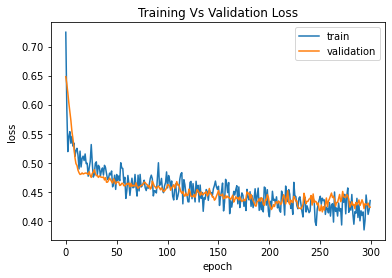

In [7]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

Plotting Training Accuracy Vs Validation Accuracy

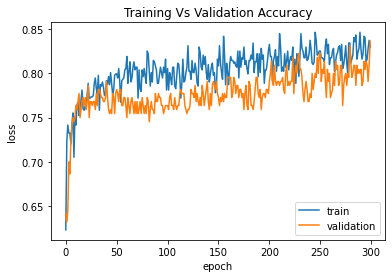

In [8]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Vs Validation Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

Making Predictions

In [9]:
# make class predictions with the model
predictions = (model.predict(scaled_X_test) > 0.5).astype(int)
print('Prediction Accuracy: {:.2f}%'.format(accuracy_score(y_test, predictions ) * 100))
print('Classification report:\n\n', classification_report(y_test, predictions))

#summarize the first 10 cases
count = 0
for i in range(10):
    print('%s => %d (expected %d)' % (scaled_X_test[i].tolist(), predictions[i], y_test[i]))
    if predictions[i] == y_test[i]:
        count+=1
print(count)

7/7 [==============================] - 0s 2ms/step
Prediction Accuracy: 83.64%
Classification report:

               precision    recall  f1-score   support

         0.0       0.91      0.75      0.82       111
         1.0       0.78      0.93      0.85       109

    accuracy                           0.84       220
   macro avg       0.85      0.84      0.84       220
weighted avg       0.85      0.84      0.84       220

[-0.9451366237162327, -0.13960797458449498, 1.06993443075885, -0.5407795960035036] => 0 (expected 0)
[-0.35341455101853425, -2.0755836811513615, 0.3200611969105032, 1.054883965298315] => 0 (expected 0)
[-1.240997660065082, -0.655868163002326, -0.7395422857012909, 2.473251575344376] => 1 (expected 1)
[-0.057553514669684974, -0.3332055452411816, -0.5765263652994764, 1.054883965298315] => 1 (expected 1)
[0.8300295943768629, -0.6236019012262115, -0.9677645742638309, -0.45213162037562477] => 1 (expected 1)
[1.4217516670745614, 0.150788381400535, 0.28745801283014105, 0

Visualising Prediction Accuracy

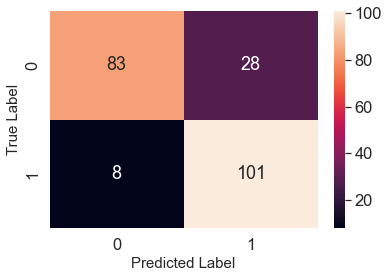

In [10]:
#Visualise with confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [11]:
#%% ROC-AUC Curve

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other

n_classes = 2 # number of class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, predictions, )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

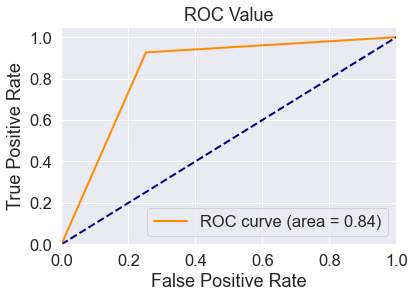

In [12]:
plt.figure()
lw = 2 # line_width
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Value')
plt.legend(loc="lower right")
plt.show()

Save Model For GUI

In [13]:
model.save('mlp.h5')